In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Step 1: Load Data
customers = pd.read_csv('/content/Customers.csv')

transactions = pd.read_csv('/content/Transactions.csv')
# Merge transactions with customer data
merged_data = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [18]:
# Step 2: Feature Engineering
customer_features = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    product_diversity=('ProductID', 'nunique')
).reset_index()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_spend', 'num_transactions', 'product_diversity']])

In [19]:
# Step 3: Apply K-Means Clustering (Proposed method)
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
customer_features['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Apply Agglomerative Hierarchical Clustering (Alternative)
hierarchical = AgglomerativeClustering(n_clusters=5)  # Adjust the number of clusters as needed
customer_features['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)



In [20]:
# Step 5: Calculate Clustering Metrics (DB Index)
kmeans_db_index = davies_bouldin_score(scaled_features, customer_features['KMeans_Cluster'])
hierarchical_db_index = davies_bouldin_score(scaled_features, customer_features['Hierarchical_Cluster'])

print(f'K-Means Davies-Bouldin Index: {kmeans_db_index}')
print(f'Hierarchical Davies-Bouldin Index: {hierarchical_db_index}')



K-Means Davies-Bouldin Index: 0.9245800474301245
Hierarchical Davies-Bouldin Index: 0.9737298271821648


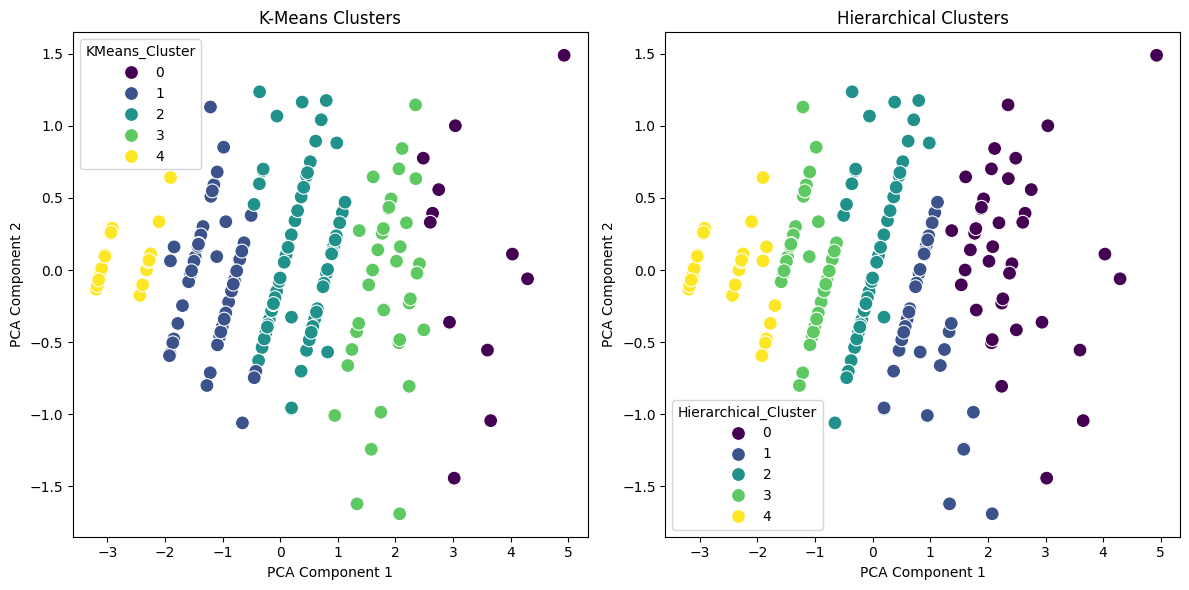

In [21]:
# Step 6: Visualize the clusters using PCA (2D projection)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the K-Means clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['KMeans_Cluster'], palette='viridis', s=100)
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot the Hierarchical clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()



In [22]:
# Step 7: Profile each cluster (K-Means)
kmeans_profile = customer_features.groupby('KMeans_Cluster').agg(
    avg_spend=('total_spend', 'mean'),
    avg_transactions=('num_transactions', 'mean'),
    avg_product_diversity=('product_diversity', 'mean')
).reset_index()



In [23]:
# Step 8: Profile each cluster (Hierarchical)
hierarchical_profile = customer_features.groupby('Hierarchical_Cluster').agg(
    avg_spend=('total_spend', 'mean'),
    avg_transactions=('num_transactions', 'mean'),
    avg_product_diversity=('product_diversity', 'mean')
).reset_index()

print("K-Means Cluster Profile:")
print(kmeans_profile)

print("Hierarchical Cluster Profile:")
print(hierarchical_profile)

K-Means Cluster Profile:
   KMeans_Cluster    avg_spend  avg_transactions  avg_product_diversity
0               0  6942.515833          9.250000               9.000000
1               1  2241.405424          3.525424               3.440678
2               2  3852.387606          5.295775               5.225352
3               3  5052.997778          7.638889               7.277778
4               4   905.476667          1.428571               1.428571
Hierarchical Cluster Profile:
   Hierarchical_Cluster    avg_spend  avg_transactions  avg_product_diversity
0                     0  6083.723158          8.157895               7.736842
1                     1  3780.889412          6.500000               6.470588
2                     2  3678.346863          4.901961               4.823529
3                     3  2437.884894          3.510638               3.446809
4                     4   968.536552          1.862069               1.793103


In [26]:

# Step 9: Save Results
kmeans_profile.to_csv('KMeans_Cluster_Profile.csv', index=False)
hierarchical_profile.to_csv('Hierarchical_Cluster_Profile.csv', index=False)
customer_features.to_csv('Customer_Clusters.csv', index=False)
kmeans_profile.head()


,KMeans_Cluster,avg_spend,avg_transactions,avg_product_diversity
0,0,6942.515833,9.250000,9.000000
1,1,2241.405424,3.525424,3.440678
2,2,3852.387606,5.295775,5.225352
3,3,5052.997778,7.638889,7.277778
4,4,905.476667,1.428571,1.428571


In [27]:
hierarchical_profile.head()


,Hierarchical_Cluster,avg_spend,avg_transactions,avg_product_diversity
0,0,6083.723158,8.157895,7.736842
1,1,3780.889412,6.500000,6.470588
2,2,3678.346863,4.901961,4.823529
3,3,2437.884894,3.510638,3.446809
4,4,968.536552,1.862069,1.793103


In [28]:
customer_features.head()

,CustomerID,total_spend,num_transactions,product_diversity,KMeans_Cluster,Hierarchical_Cluster
0,C0001,3354.52,5,5,2,2
1,C0002,1862.74,4,4,1,3
2,C0003,2725.38,4,4,1,3
3,C0004,5354.88,8,8,3,0
4,C0005,2034.24,3,3,1,3
